In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np 
import pandas as pd 

# using Seaborne for hist
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dropout
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split

from numpy.random import seed

sns.set(color_codes=True)
%matplotlib inline

# code for Tensorflow 2 !!!
print(tf.__version__)
assert(tf.__version__ >= '2.')

2.5.0


In [87]:
# Reading data
data = pd.read_csv('train_signal.csv')

# shuffle the dataframe before splitting
data = data.sample(frac=1)

df=data

In [88]:
#Basic information about numerical values in the dataset
df.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X5990,X5991,X5992,X5993,X5994,X5995,X5996,X5997,X5998,X5999
count,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,...,12584.000000,12584.000000,12584.000000,12584.000000,12583.000000,12583.000000,12583.000000,12583.000000,12582.000000,12582.000000
mean,0.002608,0.008771,0.015139,0.020327,0.024067,0.024725,0.023264,0.021561,0.019900,0.018962,...,0.005600,0.005618,0.006002,0.006847,0.007192,0.007162,0.006397,0.005329,0.004279,0.002168
std,1.444359,1.670797,1.907979,2.141337,2.329631,2.420211,2.424005,2.392944,2.373326,2.350498,...,1.007479,1.004930,1.006499,1.011444,1.010190,0.997828,0.968017,0.916646,0.851013,0.789995
min,-15.899000,-18.809000,-21.489000,-23.777000,-25.310000,-25.800000,-24.071000,-21.494000,-19.676000,-17.594000,...,-17.491000,-17.429000,-17.257000,-17.763000,-17.716000,-16.988000,-15.408000,-13.152000,-11.280000,-11.118000
25%,-0.504750,-0.535000,-0.561750,-0.578000,-0.587000,-0.595750,-0.603000,-0.600000,-0.604000,-0.607000,...,-0.413000,-0.409000,-0.405000,-0.400250,-0.394000,-0.386000,-0.372000,-0.354000,-0.329000,-0.296750
50%,-0.076500,-0.079000,-0.080000,-0.081000,-0.083000,-0.086000,-0.086000,-0.086000,-0.088500,-0.088000,...,-0.092000,-0.090000,-0.089000,-0.090500,-0.089000,-0.086000,-0.084000,-0.081000,-0.077000,-0.068000
75%,0.466000,0.507000,0.543000,0.576000,0.606750,0.627000,0.638000,0.635000,0.636000,0.631750,...,0.288000,0.289000,0.284250,0.280250,0.277000,0.274000,0.264000,0.248500,0.226000,0.199000
max,16.082000,16.051000,17.947000,19.322000,19.578000,18.692000,18.141000,18.429000,18.675000,18.852000,...,13.717000,13.841000,14.216000,14.422000,13.759000,12.846000,11.565000,9.965000,8.328000,6.739000


In [89]:
#to check the types of data in the dataset and to further convert all training data into float32.
df.dtypes

ID        object
Type      object
X0       float64
X1       float64
X2       float64
          ...   
X5995    float64
X5996    float64
X5997    float64
X5998    float64
X5999    float64
Length: 6002, dtype: object

<AxesSubplot:>

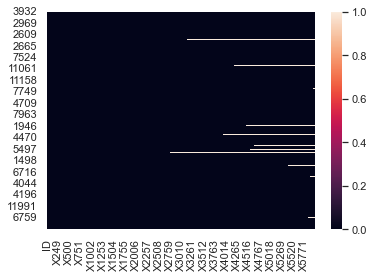

In [90]:
#To check null values of few column

cols=df.columns
sns.heatmap(df[cols].isnull())

<AxesSubplot:xlabel='X0'>

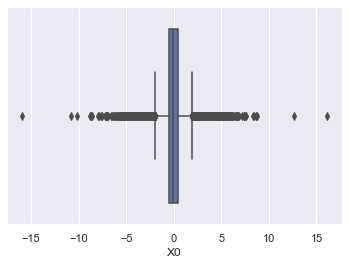

In [91]:
#To deal with outliners if we want for any column
sns.boxplot(x=df.X0)
#df=df[df['X0']<100]

In [94]:
# shuffle the dataframe before splitting
df = df.sample(frac=1)

In [95]:
# To drop if duplicate rows are used
df=df.drop_duplicates()

In [96]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [97]:
print("The numbers of ECG signals: {} and each signal has: {} samples".format(df.shape[0], df.shape[1] - 2))
print("The categorical classes of ECG: {}".format(df["Type"].unique()))
print("Numbers of signals for each class")
print(df["Type"].value_counts())

The numbers of ECG signals: 13062 and each signal has: 6000 samples
The categorical classes of ECG: ['A' 'O' 'N' '~']
Numbers of signals for each class
N    7721
O    3857
A    1160
~     324
Name: Type, dtype: int64


In [98]:
#Print "Type" configuration and "Type" configuration for first 5 data"
y = np.asanyarray(df["Type"])
print(np.unique(y))
print(y[0:5])

['A' 'N' 'O' '~']
['A' 'O' 'A' 'N' 'A']


In [99]:
missing_data = df.isnull()
columns_missing_data = []
for column in df.columns.values.tolist():
  columnn_missing_data = missing_data[column].value_counts()
  if len(columnn_missing_data) == 2:
    print(column)
    print(columnn_missing_data)
    print("")
    columns_missing_data.append(column)

if len(columns_missing_data) == 0:
  print("none of the columns have missing values")
else:
  print("These columns have missing data:")
  print(columns_missing_data)

none of the columns have missing values


In [100]:
#Print "Type" configuration and "Type" configuration for first 5 data"
y = np.asanyarray(df["Type"])
print(np.unique(y))
print(y[0:5])

['A' 'N' 'O' '~']
['A' 'O' 'A' 'N' 'A']


In [101]:
df.drop(columns = ["ID", "Type"], axis = 1, inplace = True)
X = np.asanyarray(df)

In [102]:
#creating an array of samples
n = len(X[0])
samples = np.arange(0, n)
#class 0
x_0 = X[0]
#class 1
x_1 = X[4]
#class 2
x_2 = X[12]
#class 3
x_3 = X[21]

In [103]:
np.save("ECG_signals.npy", X)

In [104]:
# Converting all training data to float32 type 
X = X.astype(np.float32)

Text(0.5, 0, 'samples')

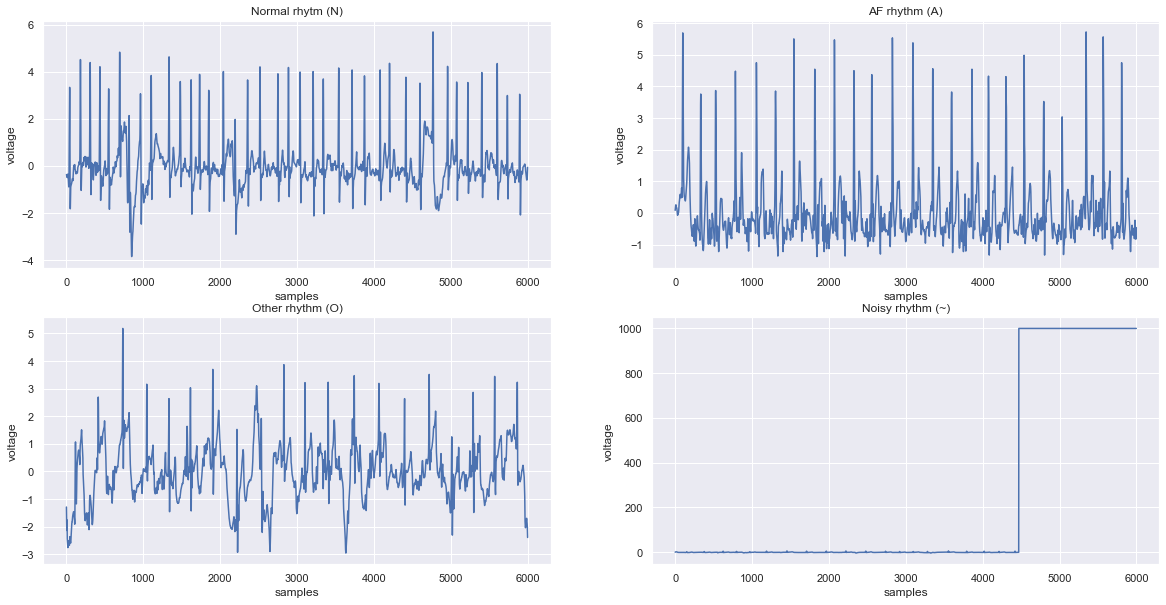

In [115]:
# To check different type of samples

fig, axes = plt.subplots(2, 2, figsize = (20,10))

sns.lineplot(x = samples, y = x_0, ax = axes[0][0])
axes[0][0].set_title("Normal rhytm (N)")
axes[0][0].set_ylabel("voltage")
axes[0][0].set_xlabel("samples")
sns.lineplot(x = samples, y = x_1, ax = axes[0][1])
axes[0][1].set_title("AF rhythm (A)")
axes[0][1].set_ylabel("voltage")
axes[0][1].set_xlabel("samples")
sns.lineplot(x = samples, y = x_2, ax = axes[1][0])
axes[1][0].set_title("Other rhythm (O)")
axes[1][0].set_ylabel("voltage")
axes[1][0].set_xlabel("samples")
sns.lineplot(x = samples, y = x_3, ax = axes[1][1])
axes[1][1].set_title("Noisy rhythm (~)")
axes[1][1].set_ylabel("voltage")
axes[1][1].set_xlabel("samples")

In [107]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist



# the data, split between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=30)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)

# need to trasnform to sort of image (2 dim tensor) for compatibility with input of CNN
X_train = np.expand_dims(X_train, axis = 2)

X_test = np.expand_dims(X_test, axis = 2)




X_train:  (2612, 6000)
X_test:  (10450, 6000)


In [108]:
# input image dimensions

# Reshape for CNN
X_train = X_train.reshape( X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape( X_test.shape[0],X_test.shape[1], 1)


In [109]:
X_train.shape

(2612, 6000, 1)

In [110]:
y_train.shape

(2612,)

In [111]:
X_test.shape

(10450, 6000, 1)

In [112]:
# define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
def build_model(input_shape):
    # using Keras functional API
    input_layer = keras.layers.Input(input_shape)

    # kernel size changed from 3 to 5
    conv0 = keras.layers.Conv2D(filters=32, kernel_size=5, padding="same", activation = "relu")(input_layer)
    #conv0 = keras.layers.BatchNormalization()(conv0)
    conv0 = keras.layers.MaxPooling2D(pool_size=2)(conv0)
    
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=5, padding="same", activation="relu")(conv0)
    conv1 = keras.layers.MaxPooling2D(pool_size=2)(conv1)
    
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu")(conv1)
    conv2 = keras.layers.MaxPooling2D(pool_size=2)(conv2)
    
    conv3 = keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu")(conv2)
    conv3 = keras.layers.MaxPooling2D(pool_size=2)(conv3)
    
    conv4 = keras.layers.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu")(conv3)
    conv4 = keras.layers.MaxPooling2D(pool_size=2)(conv4)
    
    conv5 = keras.layers.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu")(conv4)
    conv5 = keras.layers.Dropout(0.5)(conv5)
    
    conv6 = keras.layers.Conv2D(filters=256, kernel_size=5, padding="same", activation="relu")(conv5)
    conv6 = keras.layers.MaxPooling2D(pool_size=2)(conv6)
    
    conv7 = keras.layers.Conv2D(filters=256, kernel_size=5, padding="same", activation="relu")(conv6)
    conv7 = keras.layers.MaxPooling2D(pool_size=2)(conv7)
    conv7 = keras.layers.Dropout(0.5)(conv7)
    
    conv8 = keras.layers.Conv2D(filters=512, kernel_size=5, padding="same", activation="relu")(conv7)
    conv8 = keras.layers.MaxPooling2D(pool_size=2)(conv8)
    conv8 = keras.layers.Dropout(0.5)(conv8)
    
    conv9 = keras.layers.Conv2D(filters=512, kernel_size=5, padding="same", activation="relu")(conv8)
    
    gap = keras.layers.Flatten()(conv9)
    dense1 = keras.layers.Dense(64, activation = "relu")(gap)
    dense2 = keras.layers.Dropout(0.5)(dense1)
    dense3 = keras.layers.Dense(32, activation = "relu")(dense2)
    
    output_layer = keras.layers.Dense(4, activation="sigmoid")(dense3)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [113]:
seed(1234)
tf.random.set_seed(1234)


model = build_model(input_shape=( 2612, 6000,1))

# we need a smaller learning rate to have a smoother convergence
opt = keras.optimizers.Adam(learning_rate=0.02)

mc = tf.keras.callbacks.ModelCheckpoint(
        'ecg5000.h5', monitor='val_loss', verbose=4, save_best_only=True,
        save_weights_only=True, mode='min', save_freq='epoch')


from keras import metrics
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['metrics.mae, metrics.categorical_accuracy'])
              

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2612, 6000, 1)]   0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 2612, 6000, 32)    832       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1306, 3000, 32)    0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 1306, 3000, 32)    25632     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 653, 1500, 32)     0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 653, 1500, 64)     51264     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 326, 750, 64)      0   

In [1]:
# from tensorflow.keras.optimizers import Adam


# optimizer = Adam()
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model, iterating on the data in batches of 64 samples
# history = model.fit(X_train, y_train, epochs=15, batch_size= 64, validation_split=1/6)

In [ ]:
# history_dict = history.history
# history_dict.keys()

In [ ]:
#The dictionary contains entries: To generate learning curves by e.g.plotting the training and validation loss (or accuracy) side by side.
# import matplotlib.pyplot as plt
# history_dict = history.history
# loss_values = history_dict["loss"] # on training set
# val_loss_values = history_dict["val_loss"] # on validation set
# epochs = range(1, len(loss_values) + 1)
# plt.plot(epochs, loss_values, "--", color='green', label="Training loss")
# plt.plot(epochs, val_loss_values, "-", label="Validation loss") 
# plt.title("Training and validation loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()